<a href="https://colab.research.google.com/github/viniciusguirra/Projeto_Preditiva_ia/blob/main/CaseIDHM_MUNICIPIOS_viniciusguirra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case BRASIL CIDADES
   
Escola: Preditiva analytics

Curso: Analista de Dados


Aluno: Vinícius Guirra Oliveira

# Sobre os Dados:   


Este conjunto de dados contém dados de IDHM disponibilizads pela preditiva analytics e disponível em: https://www.kaggle.com/datasets/crisparada/brazilian-cities?resource=download

O Brasil é o quinto maior país do mundo em área, com 8,5 milhões de quilômetros quadrados, e o quinto mais populoso, com mais de 208 milhões de pessoas.

A República Federativa do Brasil é composta pela união dos 26 estados, pelo Distrito Federal e pelos 5.570 municípios.

Este conjunto de dados é uma compilação de diversas informações publicamente disponíveis sobre os municípios brasileiros


## Legenda de Dados:

CIDADE : Nome da cidade

ESTADO : Nome do estado

CAPITAL	: Se a cidade é capital do estado

POP_RES_IBGE	: População residente no município segundo o IBGE

ÁREA	: Área territorial

IDHM Posição 2010	: Posição  no Índice de Desenvolvimento Humano Municipal (IDHM) em 2010

IDHM Educação	: Índice de Desenvolvimento Humano Municipal (IDHM) na dimensão educação em 2010

REGIÃO TURÍSTICA	: Região turística em que o município está inserido

CATEGORIA TURÍSTICA	: Categoria turística

IDHM	: Índice de Desenvolvimento Humano Municipal (IDHM)

LONGITUDE	: Longitude

LATITUDE	: Latitude

ALTITUDE	: Altitude

POPULAÇÃO ESTIMADA	: População estimada

PIB	: Produto Interno Bruto

PIB PER CAPITA	: Produto Interno Bruto per capita

TOTAL DE EMPRESAS	: Total de empresas


# Problema de negócio:



Analisar e compreender os principais indicadores socioeconômicos, como o Índice de Desenvolvimento Humano (IDHM), o Produto Interno Bruto per Capita (PIB per Capita) e outros fatores relacionados em diferentes cidades e regiões do Brasil. O objetivo é identificar padrões, tendências e relações entre esses indicadores

• Avaliação do Desenvolvimento Humano: O projeto visa avaliar o nível de desenvolvimento humano em várias cidades e regiões do Brasil, identificando áreas que podem precisar de intervenções para melhorar indicadores como educação, renda e longevidade.

• Compreensão das Disparidades Regionais: Outro problema é entender as disparidades regionais no Brasil, ou seja, por que algumas regiões têm um melhor desempenho em termos de desenvolvimento humano e econômico do que outras.

• Relação entre Economia e Desenvolvimento: O projeto busca entender a relação entre o PIB per Capita e o IDHM, investigando se cidades com economias mais fortes também têm melhores indicadores de desenvolvimento humano.

• Crescimento Populacional e Empresas: Também se explora se o crescimento populacional está relacionado ao número de empresas em uma cidade, o que pode ser importante para o planejamento urbano e econômico.

• Turismo e Distribuição Geográfica: Por fim, o projeto analisa a distribuição geográfica do turismo no Brasil, identificando áreas com potencial para o desenvolvimento do setor.

# Instalações e Importações

In [106]:
#instalando e importando bibliotecas
!pip install gcsfs

In [107]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive

In [108]:
import warnings
warnings.filterwarnings("ignore")

# Extração

## Google Drive

In [109]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_csv('/content/drive/MyDrive/Preditiva /BRAZIL_CITIES.csv',
                   sep=';',
                 dayfirst = True)

# Pré-Análise

In [111]:
# visualização dos dados do dataframe
df

CITY STATE  CAPITAL  IBGE_RES_POP  IBGE_RES_POP_BRAS  \
0         Abadia De Goiás    GO        0        6876.0             6876.0   
1     Abadia Dos Dourados    MG        0        6704.0             6704.0   
2               Abadiânia    GO        0       15757.0            15609.0   
3                  Abaeté    MG        0       22690.0            22690.0   
4              Abaetetuba    PA        0      141100.0           141040.0   
...                   ...   ...      ...           ...                ...   
5568          Xique-Xique    BA        0       45536.0            45536.0   
5569               Zabelê    PB        0        2075.0             2075.0   
5570             Zacarias    SP        0        2335.0             2335.0   
5571              Zé Doca    MA        0       50173.0            50152.0   
5572               Zortéa    SC        0        2991.0             2991.0   

      IBGE_RES_POP_ESTR  IBGE_DU  IBGE_DU_URBAN  IBGE_DU_RURAL  IBGE_POP  ...  \
0                   0.0   2137.0         1546.0          591.0    5300.0  ...   
1                   0.0   2328.0         1481.0          847.0    4154.0  ...   
2                 148.0   4655.0         3233.0         1422.0   10656.0  ...   
3                   0.0   7694.0         6667.0         1027.0   18464.0  ...   
4                  60.0  31061.0        19057.0        12004.0   82956.0  ...   
...                 ...      ...            ...            ...       ...  ...   
5568                0.0  11637.0         8461.0         3176.0   32497.0  ...   
5569                0.0    673.0          489.0          184.0    1469.0  ...   
5570                0.0    799.0          638.0          161.0    1836.0  ...   
5571               21.0  11886.0         7611.0         4275.0   30803.0  ...   
5572                0.0   1026.0          800.0          226.0    2326.0  ...   

      Pu_Bank   Pr_Assets    Pu_Assets    Cars  Motorcycles  Wheeled_tractor  \
0         NaN         NaN          NaN  2158.0       1246.0              0.0   
1         NaN         NaN          NaN  2227.0       1142.0              0.0   
2         1.0  33724584.0   67091904.0  2838.0       1426.0              0.0   
3         2.0  44974716.0  371922572.0  6928.0       2953.0              0.0   
4         4.0  76181384.0  800078483.0  5277.0      25661.0              0.0   
...       ...         ...          ...     ...          ...              ...   
5568      3.0  51944373.0  276223306.0  2125.0       5064.0              0.0   
5569      NaN         NaN          NaN    87.0        162.0              0.0   
5570      NaN         NaN          NaN   901.0        346.0              0.0   
5571      3.0  34835818.0  531526331.0  1725.0      11087.0              0.0   
5572      NaN         NaN          NaN  1077.0        359.0              0.0   

      UBER  MAC  WAL-MART  POST_OFFICES  
0      NaN  NaN       NaN           1.0  
1      NaN  NaN       NaN           1.0  
2      NaN  NaN       NaN           3.0  
3      NaN  NaN       NaN           4.0  
4      NaN  NaN       NaN           2.0  
...    ...  ...       ...           ...  
5568   NaN  NaN       NaN           2.0  
5569   NaN  NaN       NaN           NaN  
5570   NaN  NaN       NaN           1.0  
5571   NaN  NaN       NaN           1.0  
5572   NaN  NaN       NaN           1.0  

[5573 rows x 81 columns]

In [112]:
# Visualização dos dados começando pelo cabeçalho
df.head()

CITY STATE  CAPITAL  IBGE_RES_POP  IBGE_RES_POP_BRAS  \
0      Abadia De Goiás    GO        0        6876.0             6876.0   
1  Abadia Dos Dourados    MG        0        6704.0             6704.0   
2            Abadiânia    GO        0       15757.0            15609.0   
3               Abaeté    MG        0       22690.0            22690.0   
4           Abaetetuba    PA        0      141100.0           141040.0   

   IBGE_RES_POP_ESTR  IBGE_DU  IBGE_DU_URBAN  IBGE_DU_RURAL  IBGE_POP  ...  \
0                0.0   2137.0         1546.0          591.0    5300.0  ...   
1                0.0   2328.0         1481.0          847.0    4154.0  ...   
2              148.0   4655.0         3233.0         1422.0   10656.0  ...   
3                0.0   7694.0         6667.0         1027.0   18464.0  ...   
4               60.0  31061.0        19057.0        12004.0   82956.0  ...   

   Pu_Bank   Pr_Assets    Pu_Assets    Cars  Motorcycles  Wheeled_tractor  \
0      NaN         NaN          NaN  2158.0       1246.0              0.0   
1      NaN         NaN          NaN  2227.0       1142.0              0.0   
2      1.0  33724584.0   67091904.0  2838.0       1426.0              0.0   
3      2.0  44974716.0  371922572.0  6928.0       2953.0              0.0   
4      4.0  76181384.0  800078483.0  5277.0      25661.0              0.0   

   UBER  MAC  WAL-MART  POST_OFFICES  
0   NaN  NaN       NaN           1.0  
1   NaN  NaN       NaN           1.0  
2   NaN  NaN       NaN           3.0  
3   NaN  NaN       NaN           4.0  
4   NaN  NaN       NaN           2.0  

[5 rows x 81 columns]

In [113]:
# Visualização do df começando pelo final
df.tail()

CITY STATE  CAPITAL  IBGE_RES_POP  IBGE_RES_POP_BRAS  \
5568  Xique-Xique    BA        0       45536.0            45536.0   
5569       Zabelê    PB        0        2075.0             2075.0   
5570     Zacarias    SP        0        2335.0             2335.0   
5571      Zé Doca    MA        0       50173.0            50152.0   
5572       Zortéa    SC        0        2991.0             2991.0   

      IBGE_RES_POP_ESTR  IBGE_DU  IBGE_DU_URBAN  IBGE_DU_RURAL  IBGE_POP  ...  \
5568                0.0  11637.0         8461.0         3176.0   32497.0  ...   
5569                0.0    673.0          489.0          184.0    1469.0  ...   
5570                0.0    799.0          638.0          161.0    1836.0  ...   
5571               21.0  11886.0         7611.0         4275.0   30803.0  ...   
5572                0.0   1026.0          800.0          226.0    2326.0  ...   

      Pu_Bank   Pr_Assets    Pu_Assets    Cars  Motorcycles  Wheeled_tractor  \
5568      3.0  51944373.0  276223306.0  2125.0       5064.0              0.0   
5569      NaN         NaN          NaN    87.0        162.0              0.0   
5570      NaN         NaN          NaN   901.0        346.0              0.0   
5571      3.0  34835818.0  531526331.0  1725.0      11087.0              0.0   
5572      NaN         NaN          NaN  1077.0        359.0              0.0   

      UBER  MAC  WAL-MART  POST_OFFICES  
5568   NaN  NaN       NaN           2.0  
5569   NaN  NaN       NaN           NaN  
5570   NaN  NaN       NaN           1.0  
5571   NaN  NaN       NaN           1.0  
5572   NaN  NaN       NaN           1.0  

[5 rows x 81 columns]

In [114]:
# Visualização do df de forma aleatória
# é um método da biblioteca Pandas em Python que é usado para retornar uma amostra aleatória de linhas de um DataFrame

df.sample(5)

CITY STATE  CAPITAL  IBGE_RES_POP  \
465   Balneário Arroio Do Silva    SC        0        9586.0   
2905                    Mantena    MG        0       27111.0   
1443                   Coxixola    PB        0        1771.0   
2269                   Iraquara    BA        0       22601.0   
1547                   Desterro    PB        0        7991.0   

      IBGE_RES_POP_BRAS  IBGE_RES_POP_ESTR  IBGE_DU  IBGE_DU_URBAN  \
465              9556.0               30.0   3333.0         3257.0   
2905            27083.0               28.0   8957.0         7111.0   
1443             1771.0                0.0    588.0          268.0   
2269            22601.0                0.0   6123.0         1968.0   
1547             7991.0                0.0   2317.0         1430.0   

      IBGE_DU_RURAL  IBGE_POP  ...  Pu_Bank   Pr_Assets    Pu_Assets    Cars  \
465            76.0    7632.0  ...      NaN         NaN          NaN  4022.0   
2905         1846.0   21053.0  ...      2.0  83867702.0  340067152.0  6025.0   
1443          320.0     782.0  ...      NaN         NaN          NaN   102.0   
2269         4155.0    6746.0  ...      2.0  14490678.0  124239090.0  2009.0   
1547          887.0    4876.0  ...      NaN         NaN          NaN   585.0   

      Motorcycles  Wheeled_tractor  UBER  MAC  WAL-MART  POST_OFFICES  
465        1651.0              3.0   NaN  NaN       NaN           1.0  
2905      10506.0              1.0   NaN  NaN       NaN           3.0  
1443        174.0              0.0   NaN  NaN       NaN           1.0  
2269       1352.0              0.0   NaN  NaN       NaN           2.0  
1547       1187.0              0.0   NaN  NaN       NaN           2.0  

[5 rows x 81 columns]

In [115]:
# Tamanho do df
df.shape

(5573, 81)

In [116]:
# Verificar o tipo de dado em cada coluna
df.dtypes

CITY                  object
STATE                 object
CAPITAL                int64
IBGE_RES_POP         float64
IBGE_RES_POP_BRAS    float64
                      ...   
Wheeled_tractor      float64
UBER                 float64
MAC                  float64
WAL-MART             float64
POST_OFFICES         float64
Length: 81, dtype: object

In [117]:
# Contar a quantidade de observações
df.count()

CITY                 5573
STATE                5573
CAPITAL              5573
IBGE_RES_POP         5565
IBGE_RES_POP_BRAS    5565
                     ... 
Wheeled_tractor      5562
UBER                  125
MAC                   166
WAL-MART              102
POST_OFFICES         5453
Length: 81, dtype: int64

In [118]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

In [119]:
# Backup local do df
dfback1 = df.copy()

# Transformação

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise
*  Verificação e tratamento de valores (ou observações) únicos e inconsistentes
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados via pandera

## Escolher as possíveis colunas importantes para a análise

In [120]:
'''
Após visualizarmos o dataframe podemos considerar em trabalhar somente com tais colunas abaixo'''
colunas_selecionadas = [
    'CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'AREA', 'IDHM Ranking 2010',
     'IDHM_Educacao', 'REGIAO_TUR', 'CATEGORIA_TUR',
    'IDHM', 'LONG', 'LAT', 'ALT', 'ESTIMATED_POP', 'GDP', 'GDP_CAPITA', 'COMP_TOT',
]

df = df[colunas_selecionadas]


In [121]:
#verificando se excluimos as colunas
df.dtypes

CITY                  object
STATE                 object
CAPITAL                int64
IBGE_RES_POP         float64
AREA                  object
IDHM Ranking 2010    float64
IDHM_Educacao        float64
REGIAO_TUR            object
CATEGORIA_TUR         object
IDHM                 float64
LONG                 float64
LAT                  float64
ALT                  float64
ESTIMATED_POP        float64
GDP                  float64
GDP_CAPITA           float64
COMP_TOT             float64
dtype: object

In [122]:
df

CITY STATE  CAPITAL  IBGE_RES_POP      AREA  \
0         Abadia De Goiás    GO        0        6876.0    147.26   
1     Abadia Dos Dourados    MG        0        6704.0    881.06   
2               Abadiânia    GO        0       15757.0  1,045.13   
3                  Abaeté    MG        0       22690.0  1,817.07   
4              Abaetetuba    PA        0      141100.0  1,610.65   
...                   ...   ...      ...           ...       ...   
5568          Xique-Xique    BA        0       45536.0  5,079.66   
5569               Zabelê    PB        0        2075.0    109.39   
5570             Zacarias    SP        0        2335.0    319.06   
5571              Zé Doca    MA        0       50173.0  2,140.11   
5572               Zortéa    SC        0        2991.0    190.18   

      IDHM Ranking 2010  IDHM_Educacao                           REGIAO_TUR  \
0                1689.0          0.622                                  NaN   
1                2207.0          0.563                  Caminhos Do Cerrado   
2                2202.0          0.579  Região Turística Do Ouro E Cristais   
3                1994.0          0.556                  Lago De Três Marias   
4                3530.0          0.537                   Araguaia-Tocantins   
...                 ...            ...                                  ...   
5568             4533.0          0.479                   Chapada Diamantina   
5569             3639.0          0.587                               Cariri   
5570             1072.0          0.674                                  NaN   
5571             4272.0          0.505                                  NaN   
5572              364.0          0.661                   Vale Do Contestado   

     CATEGORIA_TUR   IDHM       LONG        LAT      ALT  ESTIMATED_POP  \
0              NaN  0.708 -49.440548 -16.758812   893.60         8583.0   
1                D  0.690 -47.396832 -18.487565   753.12         6972.0   
2                C  0.690 -48.718812 -16.182672  1017.55        19614.0   
3                D  0.698 -45.446191 -19.155848   644.74        23223.0   
4                D  0.628 -48.884404  -1.723470    10.12       156292.0   
...            ...    ...        ...        ...      ...            ...   
5568             D  0.585 -42.725508 -10.824974   406.26        46440.0   
5569             E  0.623 -37.093552  -8.076874   646.34         2225.0   
5570           NaN  0.730 -50.055740 -21.050110   415.85         2684.0   
5571           NaN  0.595 -45.657698  -3.275481    35.66        51471.0   
5572             E  0.760 -51.549566 -27.450251   685.30         3328.0   

             GDP  GDP_CAPITA  COMP_TOT  
0         166.41    20664.57     284.0  
1         180.09    25591.70     476.0  
2      287984.49    15628.40     288.0  
3      430235.36    18250.42     621.0  
4     1249255.29     8222.36     931.0  
...          ...         ...       ...  
5568   342261.06     7089.97     420.0  
5569    19582.06     8793.02      20.0  
5570    75934.89    29149.67     111.0  
5571   380509.30     7489.46     470.0  
5572    66998.29    20526.44      76.0  

[5573 rows x 17 columns]

## Verificação e tratamento de valores (ou observações) únicos e inconsistentes

In [123]:
# Verificar valores inconsistentes em cada coluna
columns = ['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'AREA', 'IDHM Ranking 2010',
    'IDHM_Educacao', 'REGIAO_TUR', 'CATEGORIA_TUR',
    'IDHM', 'LONG', 'LAT', 'ALT', 'ESTIMATED_POP', 'GDP', 'GDP_CAPITA', 'COMP_TOT',]

for coluna in columns:
    # Verifique se há valores nulos
    valores_nulos = df[coluna].isnull().sum()
    print(f'Coluna "{coluna}": {valores_nulos} valores nulos')

    # Verifique valores únicos e sua contagem
    valores_unicos = df[coluna].nunique()
    print(f'Coluna "{coluna}": {valores_unicos} valores únicos')

    # Verifique estatísticas básicas
    estatisticas = df[coluna].describe()
    print(f'Coluna "{coluna}": Estatísticas básicas:')
    print(estatisticas)
    print('\n')


Coluna "CITY": 0 valores nulos
Coluna "CITY": 5299 valores únicos
Coluna "CITY": Estatísticas básicas:
count          5573
unique         5299
top       Bom Jesus
freq              5
Name: CITY, dtype: object


Coluna "STATE": 0 valores nulos
Coluna "STATE": 27 valores únicos
Coluna "STATE": Estatísticas básicas:
count     5573
unique      27
top         MG
freq       853
Name: STATE, dtype: object


Coluna "CAPITAL": 0 valores nulos
Coluna "CAPITAL": 2 valores únicos
Coluna "CAPITAL": Estatísticas básicas:
count    5573.000000
mean        0.004845
std         0.069442
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CAPITAL, dtype: float64


Coluna "IBGE_RES_POP": 8 valores nulos
Coluna "IBGE_RES_POP": 5043 valores únicos
Coluna "IBGE_RES_POP": Estatísticas básicas:
count    5.565000e+03
mean     3.427777e+04
std      2.031126e+05
min      8.050000e+02
25%      5.235000e+03
50%      1.093400e+04
75%      2.342400e+04
max   

## Verificação de duplicadas

In [124]:
# Verificar valores duplicados em todas as colunas do DataFrame
duplicados = df.duplicated()
total_duplicados = duplicados.sum()

print(f"Total de valores duplicados: {total_duplicados}")
print("Linhas duplicadas:")
print(df[duplicados])


Total de valores duplicados: 0
Linhas duplicadas:
Empty DataFrame
Columns: [CITY, STATE, CAPITAL, IBGE_RES_POP, AREA, IDHM Ranking 2010, IDHM_Educacao, REGIAO_TUR, CATEGORIA_TUR, IDHM, LONG, LAT, ALT, ESTIMATED_POP, GDP, GDP_CAPITA, COMP_TOT]
Index: []


## Verificação e tratamento de valores nulos

In [125]:
# Verificar dados Nulos, ausentes, etc - isnull()
df.isna().sum()

CITY                    0
STATE                   0
CAPITAL                 0
IBGE_RES_POP            8
AREA                    3
IDHM Ranking 2010       8
IDHM_Educacao           8
REGIAO_TUR           2288
CATEGORIA_TUR        2288
IDHM                    8
LONG                    9
LAT                     9
ALT                     9
ESTIMATED_POP           3
GDP                     3
GDP_CAPITA              3
COMP_TOT                3
dtype: int64

In [126]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

CITY                  0.0
STATE                 0.0
CAPITAL               0.0
IBGE_RES_POP          0.1
AREA                  0.1
IDHM Ranking 2010     0.1
IDHM_Educacao         0.1
REGIAO_TUR           41.1
CATEGORIA_TUR        41.1
IDHM                  0.1
LONG                  0.2
LAT                   0.2
ALT                   0.2
ESTIMATED_POP         0.1
GDP                   0.1
GDP_CAPITA            0.1
COMP_TOT              0.1
dtype: float64


In [127]:
'''
Pode se notar um alta porcentagem de valores nulos em algumas variáveis,
como também com preenchimentos incorretos ou que trariam uma vizualição ruim
dos dados apresentados. Desta forma iremos substituir alguns valores.
'''

'\nPode se notar um alta porcentagem de valores nulos em algumas variáveis,\ncomo também com preenchimentos incorretos ou que trariam uma vizualição ruim\ndos dados apresentados. Desta forma iremos substituir alguns valores.\n'

In [128]:
# operações de substituição de valores

df.REGIAO_TUR = df.REGIAO_TUR.replace(np.nan,0)
df.CATEGORIA_TUR = df.CATEGORIA_TUR.replace(np.nan,0)
df.LAT = df.LAT.replace(np.nan,0)
df.LONG = df.LONG.replace(np.nan,0)
df.CAPITAL = df.CAPITAL.replace(0,'NÃO')
df.CAPITAL = df.CAPITAL.replace(1,'SIM')

In [129]:
# Remova as linhas com valores NaN nas colunas

df = df.dropna(subset=['IBGE_RES_POP'])
df = df.dropna(subset=['IDHM Ranking 2010'])
df = df.dropna(subset=['IDHM'])

In [130]:
#visualizar informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 5572
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5564 non-null   object 
 1   STATE              5564 non-null   object 
 2   CAPITAL            5564 non-null   object 
 3   IBGE_RES_POP       5564 non-null   float64
 4   AREA               5563 non-null   object 
 5   IDHM Ranking 2010  5564 non-null   float64
 6   IDHM_Educacao      5564 non-null   float64
 7   REGIAO_TUR         5564 non-null   object 
 8   CATEGORIA_TUR      5564 non-null   object 
 9   IDHM               5564 non-null   float64
 10  LONG               5564 non-null   float64
 11  LAT                5564 non-null   float64
 12  ALT                5563 non-null   float64
 13  ESTIMATED_POP      5564 non-null   float64
 14  GDP                5564 non-null   float64
 15  GDP_CAPITA         5564 non-null   float64
 16  COMP_TOT           5564 

## Tradução/Renomeação

In [131]:
# traduzir colunas
df.rename(columns={
    'CITY': 'Cidade',
    'STATE': 'Estado',
    'CAPITAL': 'Capital',
    'IBGE_RES_POP': 'POP_RES_IBGE',
    'AREA': 'Área',
    'IDHM Ranking 2010': 'IDHM Posição 2010',
    'IDHM_Educacao': 'IDHM Educação',
    'REGIAO_TUR': 'Regiao Turística',
    'CATEGORIA_TUR': 'Categoria Turística',
    'IDHM': 'IDHM',
    'LONG': 'Longitude',
    'LAT': 'Latitude',
    'ALT': 'Altitude',
    'ESTIMATED_POP': 'População Estimada',
    'GDP': 'PIB',
    'GDP_CAPITA': 'PIB per Capita',
    'COMP_TOT': 'Total de Empresas',
    },
          inplace = True)

In [132]:
# visualizar traduções
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 5572
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cidade               5564 non-null   object 
 1   Estado               5564 non-null   object 
 2   Capital              5564 non-null   object 
 3   POP_RES_IBGE         5564 non-null   float64
 4   Área                 5563 non-null   object 
 5   IDHM Posição 2010    5564 non-null   float64
 6   IDHM Educação        5564 non-null   float64
 7   Regiao Turística     5564 non-null   object 
 8   Categoria Turística  5564 non-null   object 
 9   IDHM                 5564 non-null   float64
 10  Longitude            5564 non-null   float64
 11  Latitude             5564 non-null   float64
 12  Altitude             5563 non-null   float64
 13  População Estimada   5564 non-null   float64
 14  PIB                  5564 non-null   float64
 15  PIB per Capita       5564 non-null   f

## Transformação de tipos adequados dos dados

In [133]:
# Todos os dados estão adequados.
# Converta a coluna 'Área' para um formato numérico
df['Área'] = df['Área'].str.replace(' km²', '').str.replace(',', '').astype(float)

#Backup2

In [134]:
# Backup local do df tratado
dfback2 = df.copy()

# Carregamento

In [135]:
# Google Drive
df.to_csv('/content/drive/MyDrive/Preditiva /BRASIL_CIDADES.csv',index=False)

## Colunas a serem utilizadas

Após Pré-analise e transformação dos dados, as colunas a serem utilizadas são:

CIDADE               
ESTADO               
CAPITAL              
POP_RES_IBGE         
ÁREA                 
IDHM Posição 2010        
IDHM Educação        
REGIÃO TURÍSTICA     
CATEGORIA TURÍSTICA  
IDHM                 
LONGITUDE            
LATITUDE             
ALTITUDE             
POPULAÇÃO ESTIMADA   
PIB                  
PIB PER CAPITA       
TOTAL DE EMPRESAS



# Análises

### Como está a distribuição de IDHM´S ?

Primeiro Quartil (Q1): 0.599
Terceiro Quartil (Q3): 0.718
Interquartile Range (IQR): 0.119


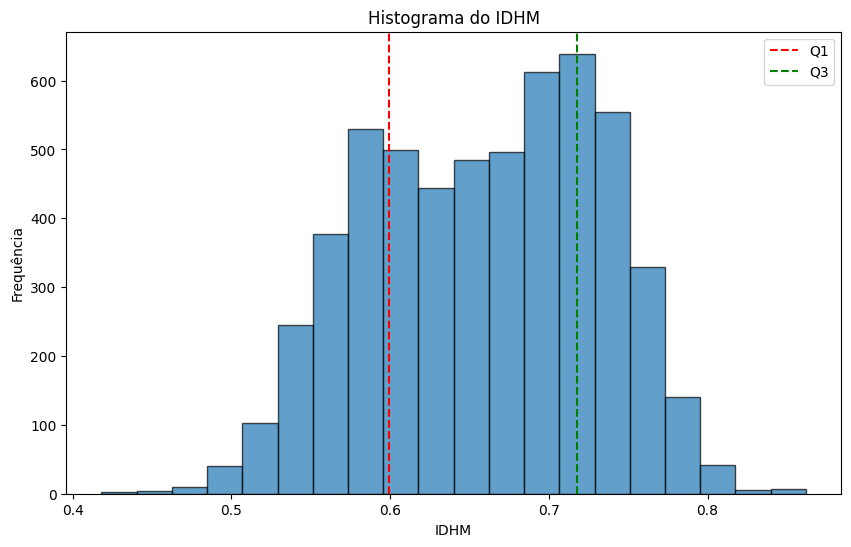

In [136]:

Q1 = df['IDHM'].quantile(0.25)
Q3 = df['IDHM'].quantile(0.75)

# Calculando o valor que separa os 25% mais baixos e os 25% mais altos
interquartile_range = Q3 - Q1

print(f"Primeiro Quartil (Q1): {Q1}")
print(f"Terceiro Quartil (Q3): {Q3}")
print(f"Interquartile Range (IQR): {interquartile_range}")

# Plote um histograma dos valores de IDHM
plt.figure(figsize=(10, 6))
plt.hist(df['IDHM'], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(Q1, color='r', linestyle='--', label='Q1')
plt.axvline(Q3, color='g', linestyle='--', label='Q3')
plt.xlabel('IDHM')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histograma do IDHM')

plt.show()

In [137]:
''' A classificação do Índice de Desenvolvimento Humano para a maioria das cidades
 situa-se entre 0,5 e 0,75, como é evidente no gráfico acima.
 '''

' A classificação do Índice de Desenvolvimento Humano para a maioria das cidades\n situa-se entre 0,5 e 0,75, como é evidente no gráfico acima.\n '

In [138]:
# Crie um DataFrame com os quartis e IQR
quartile_df = pd.DataFrame({'Quartil': ['Q1', 'Q3', 'IQR'],
                            'Valor': [Q1, Q3, interquartile_range]})

# Exiba o DataFrame
quartile_df


Quartil  Valor
0      Q1  0.599
1      Q3  0.718
2     IQR  0.119

### Como está a situação do IDH nos Estados?

In [139]:
# Calcule o IDHM médio do Brasil
idhm_medio_brasil = df['IDHM'].mean()

# Classifique os municípios de acordo com os critérios da ONU
df['Classificacao'] = pd.cut(
    df['IDHM'],
    bins=[0, 0.5499, 0.6999, 0.7999, 1.0],
    labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'],
    include_lowest=True
)

# Crie um DataFrame resumido por estado
resumo_por_estado = df.groupby('Estado')['Classificacao'].value_counts(normalize=True).unstack(fill_value=0)

# Calcule a proporção de municípios em cada categoria por estado
resumo_por_estado['Total'] = resumo_por_estado.sum(axis=1)
resumo_por_estado['% Baixo'] = resumo_por_estado['Baixo'] * 100
resumo_por_estado['% Médio'] = resumo_por_estado['Médio'] * 100
resumo_por_estado['% Alto'] = resumo_por_estado['Alto'] * 100
resumo_por_estado['% Muito Alto'] = resumo_por_estado['Muito Alto'] * 100

# Exiba a análise da situação atual do Brasil
print(f"IDHM Médio do Brasil: {idhm_medio_brasil:.2f}")
print("\nAnálise da Situação Atual do Brasil:")
print(resumo_por_estado[['Baixo', 'Médio', 'Alto', 'Muito Alto', 'Total']])

IDHM Médio do Brasil: 0.66

Análise da Situação Atual do Brasil:
Classificacao     Baixo     Médio      Alto  Muito Alto  Total
Estado                                                        
AC             0.272727  0.681818  0.045455    0.000000    1.0
AL             0.343137  0.647059  0.009804    0.000000    1.0
AM             0.338710  0.645161  0.016129    0.000000    1.0
AP             0.000000  0.875000  0.125000    0.000000    1.0
BA             0.103365  0.875000  0.021635    0.000000    1.0
CE             0.005435  0.972826  0.021739    0.000000    1.0
DF             0.000000  0.000000  0.000000    1.000000    1.0
ES             0.000000  0.602564  0.371795    0.025641    1.0
GO             0.000000  0.495935  0.504065    0.000000    1.0
MA             0.253456  0.728111  0.018433    0.000000    1.0
MG             0.010551  0.708089  0.279015    0.002345    1.0
MS             0.012821  0.602564  0.384615    0.000000    1.0
MT             0.007092  0.631206  0.361702    0.0000

In [140]:
# Defina os intervalos e rótulos para categorizar o IDHM
intervalos = [0, 0.549, 0.699, 0.799, 1]
categorias = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

# Crie uma nova coluna 'Classificacao' no DataFrame com base nos intervalos e rótulos
df['Classificacao'] = pd.cut(df['IDHM'], bins=intervalos, labels=categorias)

# Crie uma tabela de frequência absoluta
tabela_absoluta = df['Classificacao'].value_counts().reset_index()
tabela_absoluta.columns = ['Classificacao', 'Frequência Absoluta']

# Crie uma tabela de frequência relativa
tabela_absoluta['Frequência Relativa'] = tabela_absoluta['Frequência Absoluta'] / len(df)

# Crie uma tabela de frequência acumulada
tabela_absoluta['Frequência Acumulada'] = tabela_absoluta['Frequência Absoluta'].cumsum()

# Ordene a tabela pela ordem das categorias
tabela_absoluta = tabela_absoluta.reindex([3, 0, 2, 1])

# Exiba a tabela final
print(tabela_absoluta)

  Classificacao  Frequência Absoluta  Frequência Relativa  \
3    Muito Alto                   50             0.008986   
0         Médio                 3241             0.582495   
2         Baixo                  322             0.057872   
1          Alto                 1951             0.350647   

   Frequência Acumulada  
3                  5564  
0                  3241  
2                  5514  
1                  5192  


In [141]:
# Note que apenas 50 cidades de 5564 analisadas tem IDHM considerado Muito Alto.

In [142]:
# Definir os intervalos de IDHM
intervalos = [0, 0.549, 0.699, 0.799, 1]
categorias = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

# Adicionar uma coluna 'Classificacao' ao DataFrame com as categorias
df['Classificacao'] = pd.cut(df['IDHM'], bins=intervalos, labels=categorias)

# Verificar a distribuição das classificações
tabela_frequencia = df['Classificacao'].value_counts().reset_index()
tabela_frequencia.columns = ['Classificação', 'Frequência Absoluta']

In [143]:
# Calcular a frequência relativa
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência Absoluta'] / len(df)

# Calcular a frequência acumulada
tabela_frequencia['Frequência Acumulada'] = tabela_frequencia['Frequência Relativa'].cumsum()

# Classificar a tabela pela classificação
tabela_frequencia = tabela_frequencia.sort_values(by='Classificação')

In [144]:
# Encontrar o estado com mais cidades de menor IDHM (Baixo)
estado_mais_cidades_baixo_idhm = df[df['Classificacao'] == 'Baixo']['Estado'].mode()[0]

# Imprimir o estado com mais cidades de menor IDHM
print(f"O estado com mais cidades de menor IDHM (Baixo) é {estado_mais_cidades_baixo_idhm}.")

O estado com mais cidades de menor IDHM (Baixo) é PI.


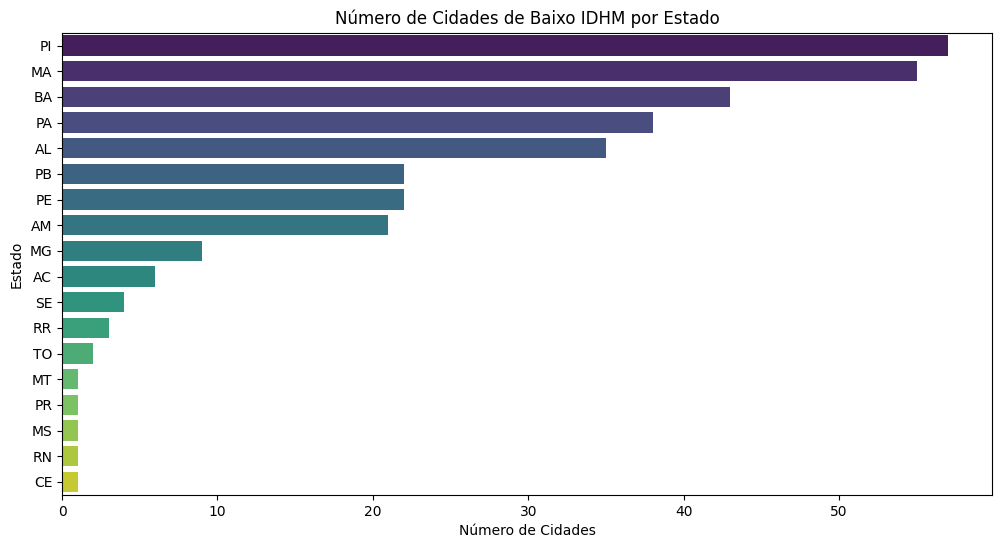

In [145]:
# Filtrar o DataFrame para cidades de menor IDHM (Baixo)
cidades_baixo_idhm = df[df['Classificacao'] == 'Baixo']

# Contar o número de cidades por estado
contagem_estado = cidades_baixo_idhm['Estado'].value_counts().reset_index()
contagem_estado.columns = ['Estado', 'Número de Cidades']

# Plotar o gráfico de combinação
plt.figure(figsize=(12, 6))
sns.barplot(x='Número de Cidades', y='Estado', data=contagem_estado, palette='viridis')
plt.title('Número de Cidades de Baixo IDHM por Estado')
plt.xlabel('Número de Cidades')
plt.ylabel('Estado')
plt.show()

In [146]:
# As Regiões Norte e Nordeste são as que apresentam os menores IDHM´S.

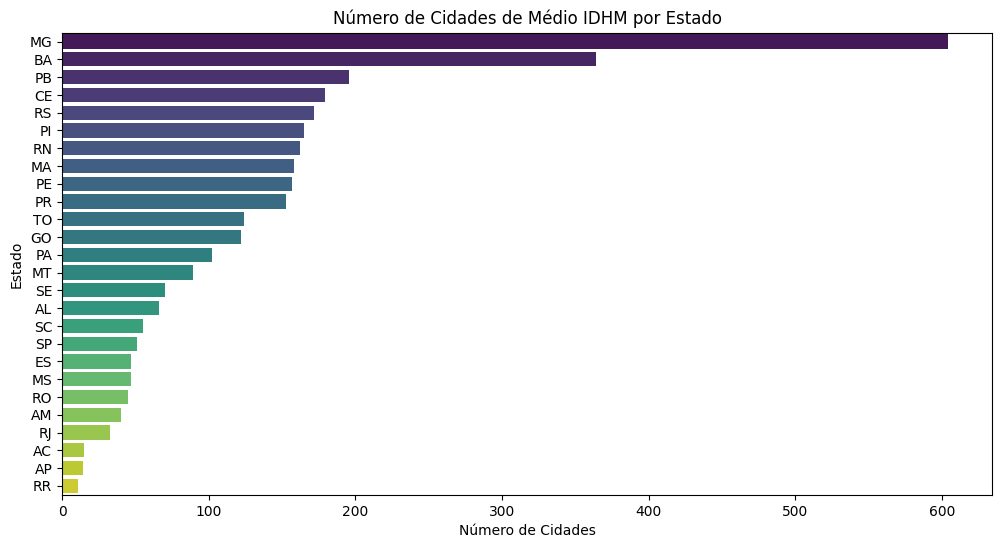

In [147]:
# Filtrar o DataFrame para cidades de menor IDHM (Médio)
cidades_baixo_idhm = df[df['Classificacao'] == 'Médio']

# Contar o número de cidades por estado
contagem_estado = cidades_baixo_idhm['Estado'].value_counts().reset_index()
contagem_estado.columns = ['Estado', 'Número de Cidades']

# Plotar o gráfico de combinação
plt.figure(figsize=(12, 6))
sns.barplot(x='Número de Cidades', y='Estado', data=contagem_estado, palette='viridis')
plt.title('Número de Cidades de Médio IDHM por Estado')
plt.xlabel('Número de Cidades')
plt.ylabel('Estado')
plt.show()

In [148]:
# O Estado de Minas Gerais tem um destaque considerável dentro desta classificação.

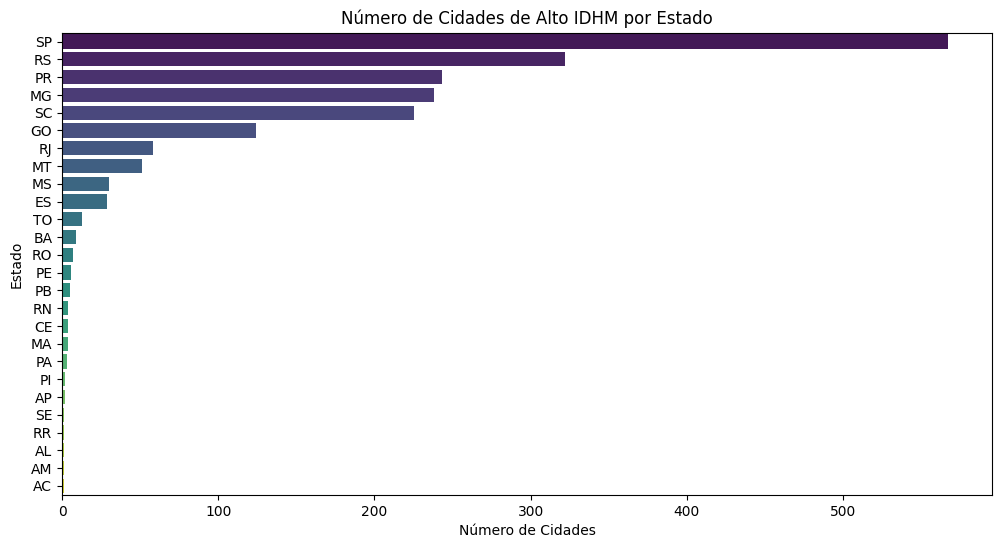

In [149]:
# Filtrar o DataFrame para cidades de menor IDHM (Alto)
cidades_baixo_idhm = df[df['Classificacao'] == 'Alto']

# Contar o número de cidades por estado
contagem_estado = cidades_baixo_idhm['Estado'].value_counts().reset_index()
contagem_estado.columns = ['Estado', 'Número de Cidades']

# Plotar o gráfico de combinação
plt.figure(figsize=(12, 6))
sns.barplot(x='Número de Cidades', y='Estado', data=contagem_estado, palette='viridis')
plt.title('Número de Cidades de Alto IDHM por Estado')
plt.xlabel('Número de Cidades')
plt.ylabel('Estado')
plt.show()

In [150]:
# A Região Sul tem os seus 3 Estados entre os 5 primeiros nesta classificação.

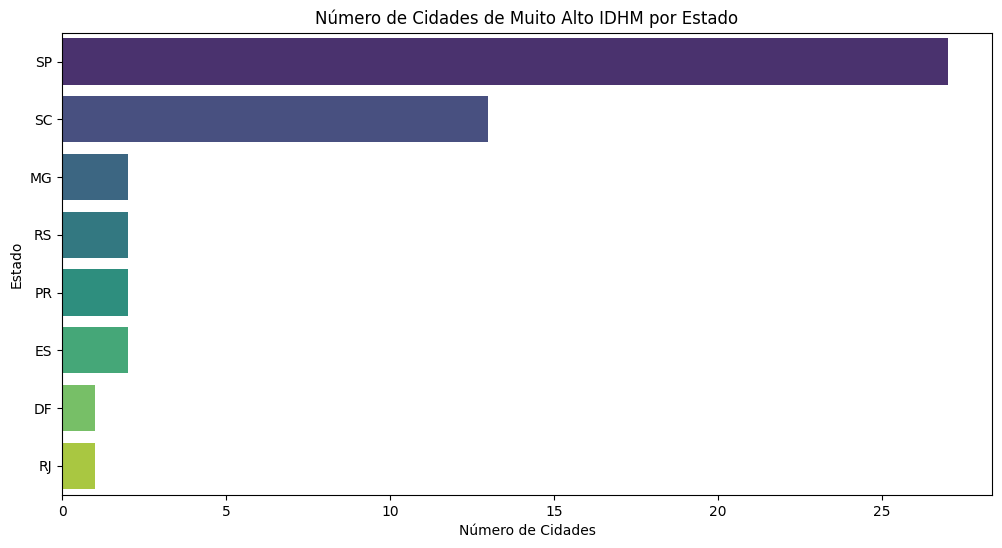

In [151]:
# Filtrar o DataFrame para cidades de menor IDHM (Muito Alto)
cidades_baixo_idhm = df[df['Classificacao'] == 'Muito Alto']

# Contar o número de cidades por estado
contagem_estado = cidades_baixo_idhm['Estado'].value_counts().reset_index()
contagem_estado.columns = ['Estado', 'Número de Cidades']

# Plotar o gráfico de combinação
plt.figure(figsize=(12, 6))
sns.barplot(x='Número de Cidades', y='Estado', data=contagem_estado, palette='viridis')
plt.title('Número de Cidades de Muito Alto IDHM por Estado')
plt.xlabel('Número de Cidades')
plt.ylabel('Estado')
plt.show()

In [152]:
# O Estado de São Paulo tem mais da metade das cidades com os melhores IDHM´S.

### Quais são as cidades com piores e melhores IDHM´S ?

In [153]:
# Ordene o DataFrame pelo IDHM em ordem crescente para obter as cidades com menor IDHM
cidades_menor_idhm = df.sort_values(by='IDHM')[['Cidade', 'Estado', 'IDHM']]

# Calcule a distribuição acumulada
cidades_menor_idhm['Cidades Acumuladas'] = cidades_menor_idhm.groupby('Estado').cumcount() + 1

# Exiba as primeiras linhas do DataFrame com as informações
print(cidades_menor_idhm)

                  Cidade Estado   IDHM  Cidades Acumuladas
3042             Melgaço     PA  0.418                   1
1774     Fernando Falcão     MA  0.440                   1
418     Atalaia Do Norte     AM  0.450                   1
2924      Marajá Do Sena     MA  0.452                   2
5366            Uiramutã     RR  0.453                   1
...                  ...    ...    ...                 ...
467   Balneário Camboriú     SC  0.845                 292
5536             Vitória     ES  0.845                  78
1812       Florianópolis     SC  0.847                 293
69    Águas De São Pedro     SP  0.850                 644
4607  São Caetano Do Sul     SP  0.862                 645

[5564 rows x 4 columns]


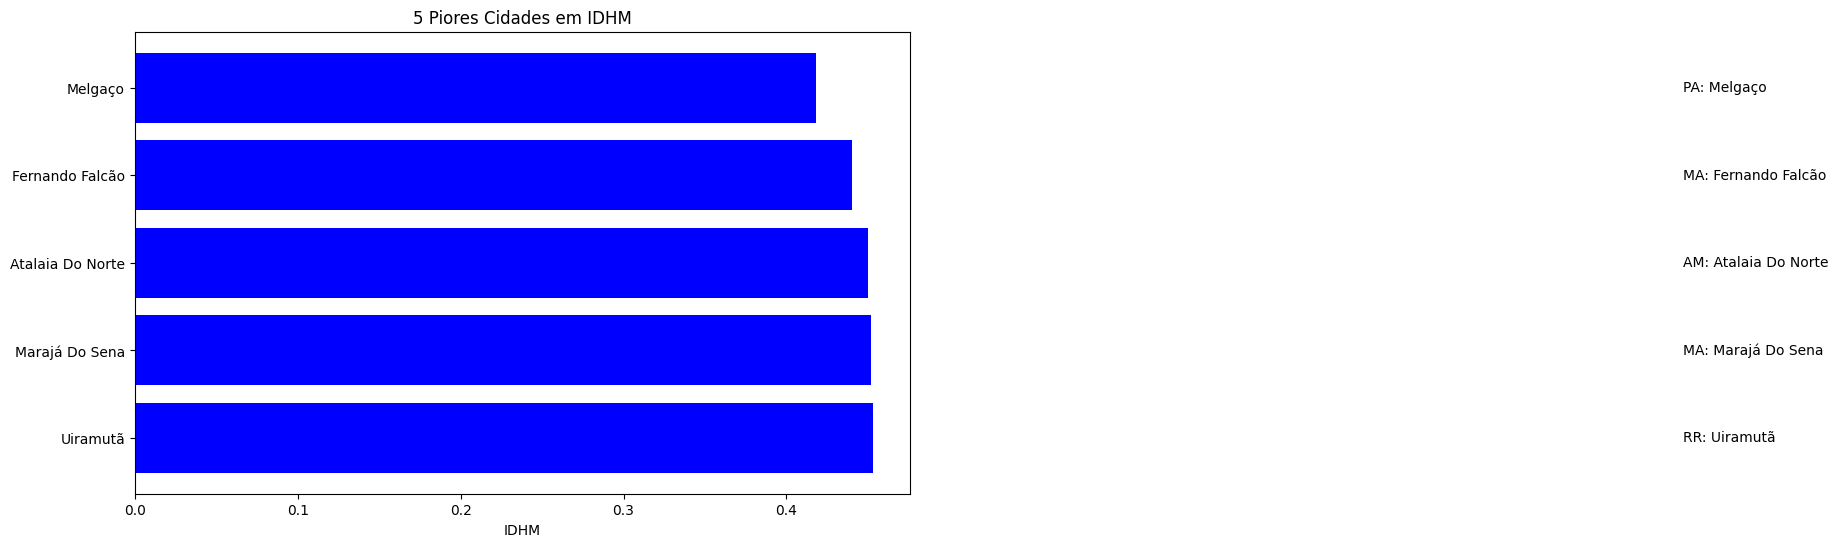

In [154]:

# Ordene o DataFrame pelo IDHM em ordem crescente e pegue as 5 piores cidades
piores_cidades = df.sort_values(by='IDHM').head(5)

# Configure a cor vermelha para essas cidades
cores = ['red' if cidade in piores_cidades['Cidade'].values else 'blue' for cidade in df['Cidade']]

# Crie um gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(piores_cidades['Cidade'], piores_cidades['IDHM'], color=cores)
plt.xlabel('IDHM')
plt.title('5 Piores Cidades em IDHM')
plt.gca().invert_yaxis()  # Inverta o eixo y para que as cidades com o pior IDHM apareçam no topo

# Adicione os estados das cidades ao lado direito do gráfico
for i, (cidade, estado) in enumerate(zip(piores_cidades['Cidade'], piores_cidades['Estado'])):
    plt.text(0.95, i, f'{estado}: {cidade}', va='center')

# Mostre o gráfico
plt.show()

In [155]:
# Duas cidades pertencem ao Estado do Maranhão e as demais a Estados da Região Norte.

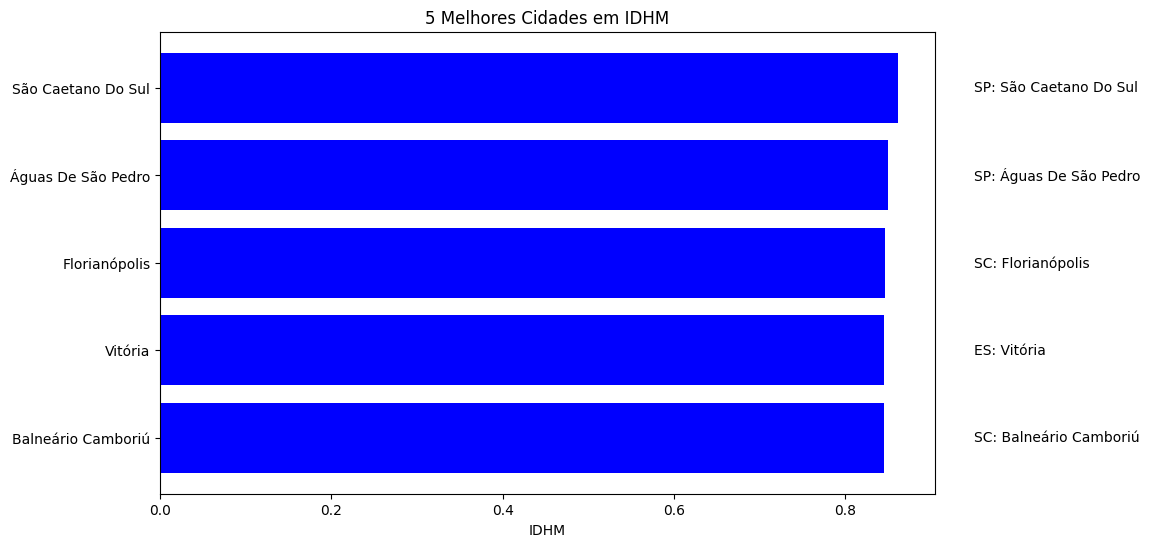

In [156]:
# Ordene o DataFrame pelo IDHM em ordem decrescente e pegue as 5 melhores cidades
melhores_cidades = df.sort_values(by='IDHM', ascending=False).head(5)

# Configure a cor verde para essas cidades
cores = ['green' if cidade in melhores_cidades['Cidade'].values else 'blue' for cidade in df['Cidade']]

# Crie um gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(melhores_cidades['Cidade'], melhores_cidades['IDHM'], color=cores)
plt.xlabel('IDHM')
plt.title('5 Melhores Cidades em IDHM')
plt.gca().invert_yaxis()  # Inverta o eixo y para que as cidades com o melhor IDHM apareçam no topo

# Adicione os estados das cidades ao lado direito do gráfico
for i, (cidade, estado) in enumerate(zip(melhores_cidades['Cidade'], melhores_cidades['Estado'])):
    plt.text(0.95, i, f'{estado}: {cidade}', va='center')

# Mostre o gráfico
plt.show()

In [157]:
# Totalidade de cidades 'Suldestinas' tendo duas capitais entre as 5 melhores.

### Relação IDHM x PIB

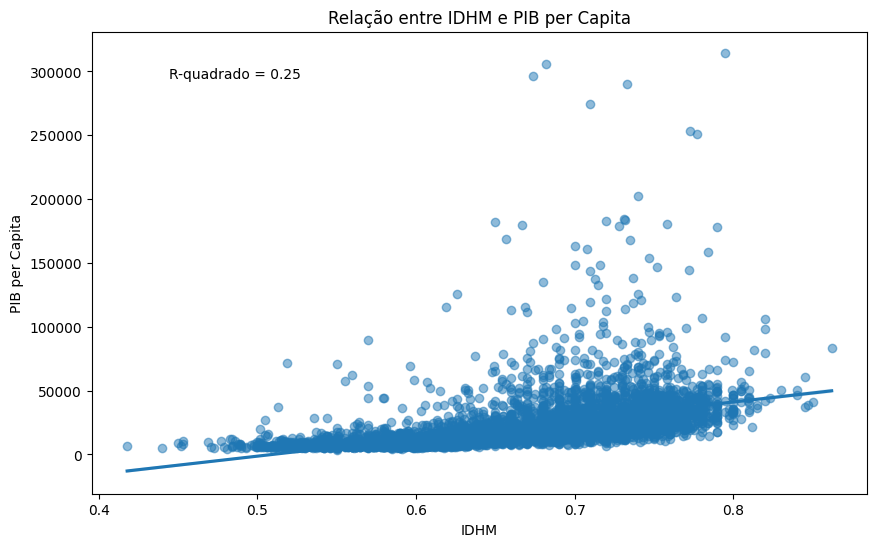

In [158]:
# gráfico de dispersão com linha de tendência e exiba o R-quadrado
plt.figure(figsize=(10, 6))
sns.regplot(x='IDHM', y='PIB per Capita', data=df, scatter_kws={"alpha": 0.5})
plt.xlabel('IDHM')
plt.ylabel('PIB per Capita')
plt.title('Relação entre IDHM e PIB per Capita')

# Calcule o R-quadrado
correlation = df['IDHM'].corr(df['PIB per Capita'])
r_squared = correlation ** 2
plt.text(0.1, 0.9, f'R-quadrado = {r_squared:.2f}', transform=plt.gca().transAxes)

# Exiba o gráfico
plt.show()

In [159]:
'''R-quadrado de 0,25 sugere que a relação entre o IDHM e o PIB per Capita não é muito forte
e que outros fatores podem desempenhar um papel significativo na determinação
do PIB per Capita das regiões ou municípios em análise. '''

'R-quadrado de 0,25 sugere que a relação entre o IDHM e o PIB per Capita não é muito forte \ne que outros fatores podem desempenhar um papel significativo na determinação \ndo PIB per Capita das regiões ou municípios em análise. '

### As capitais dos estados tem maior IDHM ?

In [160]:
# Substitua 'df' pelo nome do seu DataFrame
fig = px.violin(df, y='IDHM', x='Capital', box=True, points='all')

# Personalize o layout do gráfico, se necessário
fig.update_layout(
    title="Gráfico de Violino de IDHM por Capital",
    xaxis_title="Capital",
    yaxis_title="IDHM"
)

# Exiba o gráfico
fig.show()

In [161]:
'''O gráfico mostra a distribuição do IDHM para as cidades capitais e não capitais.
É possível observar que as cidades capitais, em geral,
têm um IDHM mais alto do que as cidades não capitais '''

'O gráfico mostra a distribuição do IDHM para as cidades capitais e não capitais.\nÉ possível observar que as cidades capitais, em geral,\ntêm um IDHM mais alto do que as cidades não capitais '

###  Relação IDHM Educacao por região: Norte, Nordeste, Sudeste, Sul e Centro-Oeste.

In [162]:
estado_para_regiao = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AM': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro Oeste',
    'MA': 'Nordeste',
    'MG': 'Sudeste',
    'MS': 'Centro Oeste',
    'MT': 'Centro Oeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'PR': 'Sul',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RO': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'SC': 'Sul',
    'SE': 'Nordeste',
    'SP': 'Sudeste',
    'TO': 'Norte'
}

# Adicione uma nova coluna 'Regiao' ao DataFrame com base no mapeamento
df['Regiao'] = df['Estado'].map(estado_para_regiao)

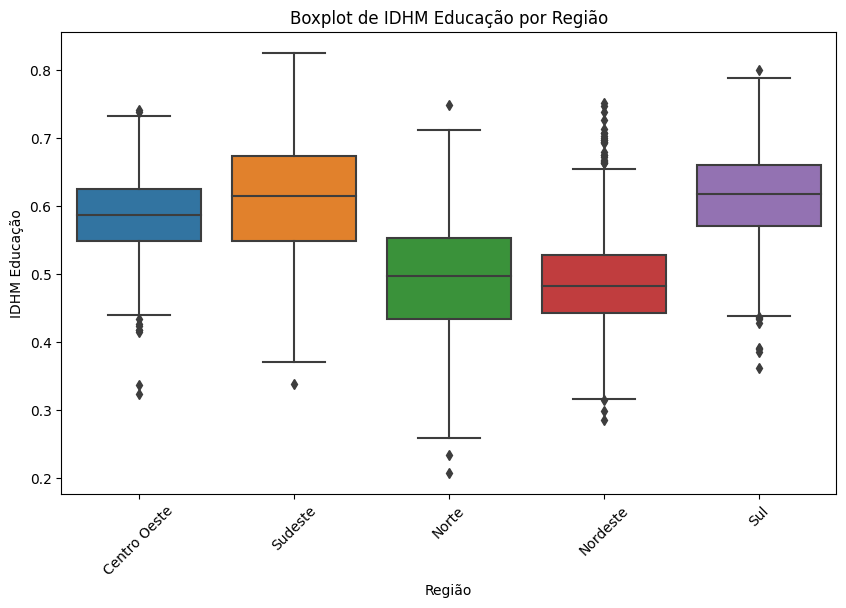

In [163]:
# Crie o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Regiao', y='IDHM Educação', data=df)
plt.xlabel('Região')
plt.ylabel('IDHM Educação')
plt.title('Boxplot de IDHM Educação por Região')
plt.xticks(rotation=45)
plt.show()

In [164]:
''' Com base nos resultados aproximados dos boxplots da variável IDHM Educação por região,
podemos observar as seguintes concentrações:
Região Centro-Oeste: Concentra-se principalmente entre 0,550 e 0,625 no índice de IDHM Educação.
Região Sudeste: Apresenta uma faixa mais ampla, concentrando-se aproximadamente entre 0,550 e 0,680 no índice de IDHM Educação.
Região Norte: Tem uma concentração entre 0,450 e 0,560 no índice de IDHM Educação.
Região Nordeste: Concentra-se principalmente entre 0,460 e 0,525 no índice de IDHM Educação.
Região Sul: Mostra uma concentração entre 0,580 e 0,670 no índice de IDHM Educação. '''

' Com base nos resultados aproximados dos boxplots da variável IDHM Educação por região, \npodemos observar as seguintes concentrações:\nRegião Centro-Oeste: Concentra-se principalmente entre 0,550 e 0,625 no índice de IDHM Educação.\nRegião Sudeste: Apresenta uma faixa mais ampla, concentrando-se aproximadamente entre 0,550 e 0,680 no índice de IDHM Educação.\nRegião Norte: Tem uma concentração entre 0,450 e 0,560 no índice de IDHM Educação.\nRegião Nordeste: Concentra-se principalmente entre 0,460 e 0,525 no índice de IDHM Educação.\nRegião Sul: Mostra uma concentração entre 0,580 e 0,670 no índice de IDHM Educação. '

### As cidades com mais empresas mostram mais crescimento populacional?

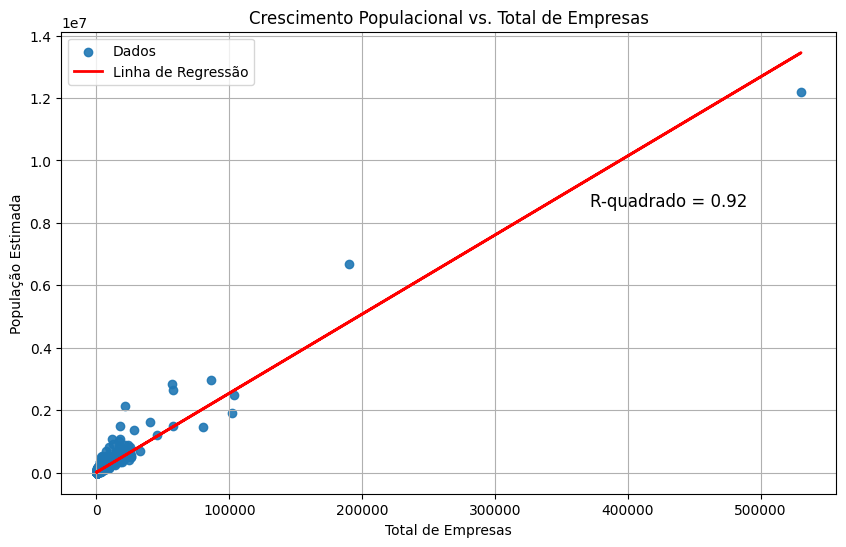

Correlação: 0.96
R-quadrado: 0.92


In [165]:
# Calcule a correlação entre o número total de empresas e o crescimento populacional
correlation = df['Total de Empresas'].corr(df['População Estimada'])

# Crie um gráfico de dispersão com uma linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['Total de Empresas'], df['População Estimada'], alpha=0.9, label='Dados')
plt.xlabel('Total de Empresas')
plt.ylabel('População Estimada')

# Ajuste um modelo de regressão linear
regression = LinearRegression()
X = df[['Total de Empresas']]
y = df['População Estimada']
regression.fit(X, y)

# Calcule as previsões
y_pred = regression.predict(X)

# Plote a linha de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')

# Calcule o coeficiente de determinação (R-quadrado)
r2 = r2_score(y, y_pred)

# Adicione o valor de R-quadrado ao gráfico
plt.text(0.7 * max(df['Total de Empresas']), 0.7 * max(df['População Estimada']),
         f'R-quadrado = {r2:.2f}', fontsize=12)

plt.legend()
plt.title('Crescimento Populacional vs. Total de Empresas')
plt.grid(True)
plt.show()

# Exiba a correlação e o R-quadrado
print(f'Correlação: {correlation:.2f}')
print(f'R-quadrado: {r2:.2f}')


In [166]:
''' Podemos ver um Correlação muito Forte de 0.96 e um R-quadrado de 0.92.Deste modo
é seguro dizer que as cidades com grande número de empresas tendem, compreensivelmente,
a ter um grande aumento populacional. A razão pode ser mais oportunidades de
emprego nas grandes cidades, o que atrai muitas pessoas para essas cidades. '''

' Podemos ver um Correlação muito Forte de 0.96 e um R-quadrado de 0.92.Deste modo \né seguro dizer que as cidades com grande número de empresas tendem, compreensivelmente, \na ter um grande aumento populacional. A razão pode ser mais oportunidades de \nemprego nas grandes cidades, o que atrai muitas pessoas para essas cidades. '

### As cidades com um Produto Interno Bruto per Capita mais alto têm um Índice de Desenvolvimento Humano (IDH) melhor ?

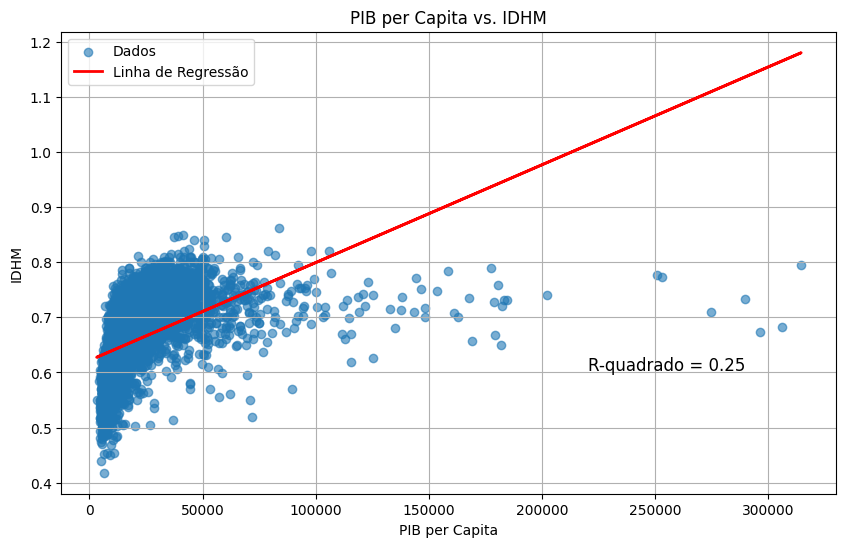

Correlação: 0.50
R-quadrado: 0.25


In [167]:
# Calcule a correlação entre PIB per Capita e IDH
correlation = df['PIB per Capita'].corr(df['IDHM'])

# Crie um gráfico de dispersão com uma linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['PIB per Capita'], df['IDHM'], alpha=0.6, label='Dados')
plt.xlabel('PIB per Capita')
plt.ylabel('IDHM')

# Ajuste um modelo de regressão linear
regression = LinearRegression()
X = df[['PIB per Capita']]
y = df['IDHM']
regression.fit(X, y)

# Calcule as previsões
y_pred = regression.predict(X)

# Plote a linha de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')

# Calcule o coeficiente de determinação (R-quadrado)
r2 = r2_score(y, y_pred)

# Adicione o valor de R-quadrado ao gráfico
plt.text(0.7 * max(df['PIB per Capita']), 0.7 * max(df['IDHM']),
         f'R-quadrado = {r2:.2f}', fontsize=12)

plt.legend()
plt.title('PIB per Capita vs. IDHM')
plt.grid(True)
plt.show()

# Exiba a correlação e o R-quadrado
print(f'Correlação: {correlation:.2f}')
print(f'R-quadrado: {r2:.2f}')

In [168]:
''' A correlação entre o PIB per Capita e o IDHM é de 0.50, o que indica uma correlação
positiva moderada entre essas duas variáveis. O coeficiente de determinação (R-quadrado)
de 0.25 significa que aproximadamente 25% da variação no IDHM pode ser explicada
pela variação no PIB per Capita. Portanto, há uma associação significativa,
mas ainda existe uma considerável variação não explicada por essa relação.'''

' A correlação entre o PIB per Capita e o IDHM é de 0.50, o que indica uma correlação \npositiva moderada entre essas duas variáveis. O coeficiente de determinação (R-quadrado) \nde 0.25 significa que aproximadamente 25% da variação no IDHM pode ser explicada \npela variação no PIB per Capita. Portanto, há uma associação significativa, \nmas ainda existe uma considerável variação não explicada por essa relação.'

### Como o turismo está distribuído?

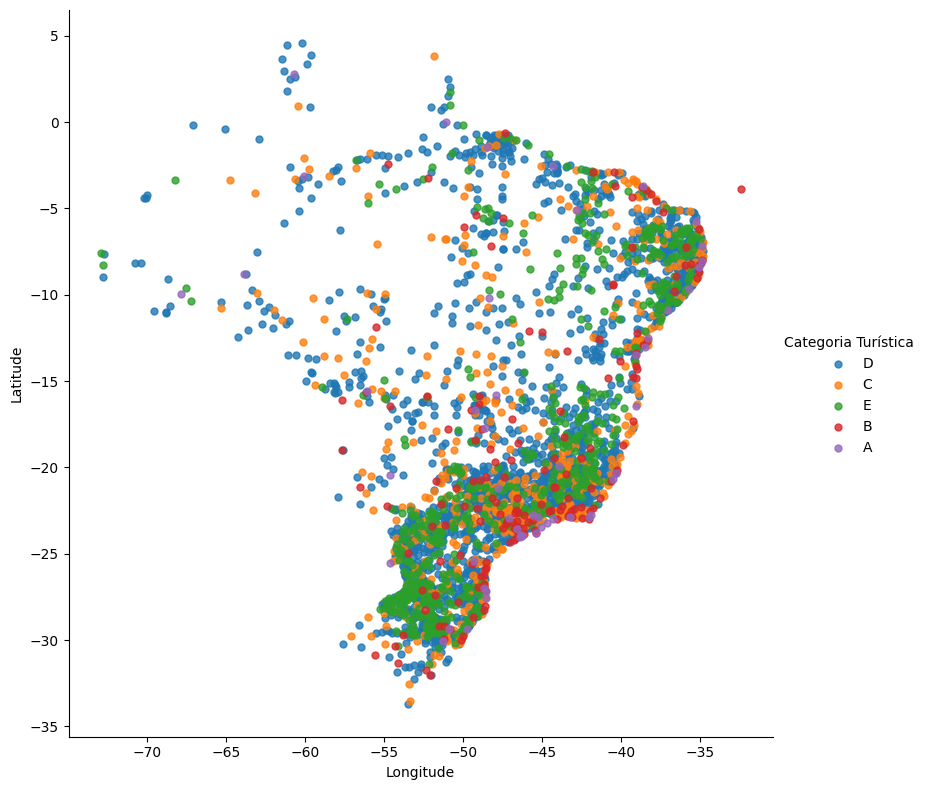

In [169]:
mask1= df["Longitude"] != 0
mask2 = df["Latitude"] !=0
mask3 = df["Categoria Turística"] != 0.

sns.lmplot( x="Longitude", y="Latitude", data=df[mask1&mask2&mask3],
           fit_reg=False, hue='Categoria Turística', legend=True, scatter_kws={"s": 25},
          height=8)

In [170]:
# Pesquisei sobre o que seriam as categorias, porém a página não trouxe respostas.

In [171]:
# número de regiões turísticas por estado
count_regioes = df.groupby('Estado')['Regiao Turística'].nunique()

# gráfico de barras para a contagem de regiões por estado
fig1 = px.bar(count_regioes, x=count_regioes.index, y=count_regioes.values,
              title='Total de Regiões Turísticas por Estado',
              labels={'x': 'Nome do Estado', 'y': 'Contagem'})
fig1.update_xaxes(categoryorder='total ascending')
fig1.show()

# gráfico de barras empilhadas para a porcentagem de categorias de turismo por estado
categories_percentage = pd.crosstab(df['Estado'], df['Categoria Turística'], normalize='index')
fig2 = px.bar(categories_percentage, x=categories_percentage.index, y=categories_percentage.columns,
              title='% de Categorias de Turismo por Estado',
              labels={'x': 'Nome do Estado', 'y': '% do Total'},
              barmode='stack')
fig2.update_xaxes(categoryorder='total ascending')
fig2.show()


In [172]:
# SP, MG e RS são as cidades com mais regiões turísticas.

# PyGWalker

PyGWalker (pronunciado como "Pig Walker") é um portmanteau peculiar de "ligação Python de Graphic Walker". Ele funde o Jupyter Notebook (ou outros notebooks baseados em jupyter) com o Graphic Walker(abre em uma nova aba). Os cientistas de dados agora podem criar visualizações de dados usando arrastar e soltar, em vez de usar códigos Python!
Fonte:
https://docs.kanaries.net/pygwalker
https://dadosaocubo.com/tableau-python-pygwalker/

In [62]:
!pip install pygwalker
import pygwalker as pyg
# intalando e importando o pygwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.7/303.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00


In [63]:
gwalker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# Conclusões

Com base nas análises dos gráficos e das informações apresentadas:

* Distribuição de IDHM: A maioria das cidades possui um IDHM entre 0,5 e 0,75, indicando um nível moderado a alto de desenvolvimento humano. A média do IDHM no Brasil é de 0,66. Apenas um pequeno número de cidades possui um IDHM considerado "Muito Alto."

* Regionalização do IDHM: As regiões Norte e Nordeste apresentam os IDHMs mais baixos, enquanto a Região Sul tem um desempenho notável, com todos os três estados entre os cinco primeiros em termos de IDHM alto. O Estado de São Paulo se destaca com a maioria das cidades apresentando IDHMs "Muito Altos."

* Relação entre IDHM e PIB per Capita: A relação entre o IDHM e o PIB per Capita mostra uma correlação moderada, indicando que há uma associação significativa entre essas variáveis. No entanto, o R-quadrado de 0,25 sugere que outros fatores desempenham um papel significativo na determinação do PIB per Capita das regiões ou municípios.

* IDHM das Capitais: As cidades capitais tendem a ter um IDHM mais alto em comparação com as cidades não capitais, sugerindo que a concentração de recursos e serviços nas capitais contribui para um melhor desenvolvimento humano.

* Relação entre IDHM Educação e Regiões: As regiões brasileiras mostram variações nas pontuações do IDHM Educação. O Centro-Oeste tem um IDHM Educação concentrado entre 0,550 e 0,625, enquanto o Sudeste possui uma faixa mais ampla. O Norte e o Nordeste tendem a ter IDHM Educação mais baixos, e o Sul apresenta uma faixa de valores mais elevados.

* Relação entre Número de Empresas e Crescimento Populacional: Existe uma forte correlação positiva entre o número de empresas e o crescimento populacional, com um R-quadrado de 0,92. Isso sugere que cidades com mais empresas geralmente experimentam um maior aumento na população, possivelmente devido a oportunidades de emprego.

* Relação entre PIB per Capita e IDH: Há uma correlação positiva moderada entre o PIB per Capita e o IDHM, indicando que cidades com PIB per Capita mais alto tendem a ter um IDHM melhor. No entanto, apenas 25% da variação no IDHM pode ser explicada pelo PIB per Capita, sugerindo que outros fatores também desempenham um papel importante.

* Distribuição do Turismo: São Paulo (SP), Minas Gerais (MG) e Rio Grande do Sul (RS) são os estados com mais regiões turísticas, indicando uma concentração significativa de atividades turísticas nessas áreas.

Essas análises fornecem uma visão geral das relações entre diferentes variáveis socioeconômicas e de desenvolvimento em várias regiões do Brasil. Elas podem ser úteis para orientar políticas públicas e estratégias de desenvolvimento em nível regio